In [ ]:
# Improved K-Means Clustering for Customer Segmentation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Load data
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
# Rename columns
df.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'}, inplace=True)

In [ ]:
# Select numerical features
features = ['Age', 'Annual_income', 'Spending_score']
X = df[features]

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

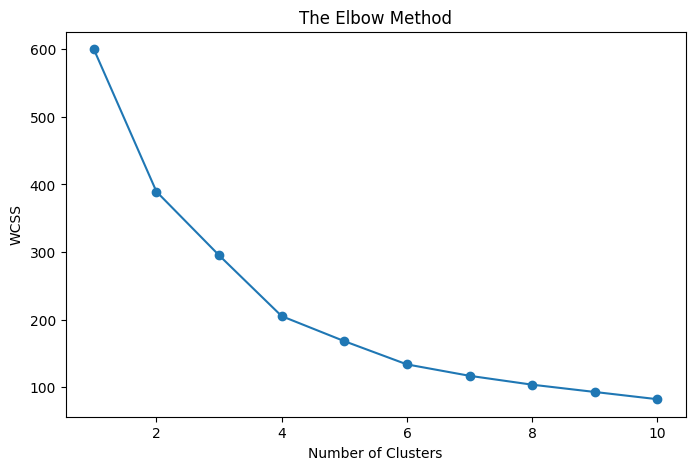

In [ ]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
df['KMeansCluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
kmeans

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
# Silhouette Score
score = silhouette_score(X_scaled, df['KMeansCluster'])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.42


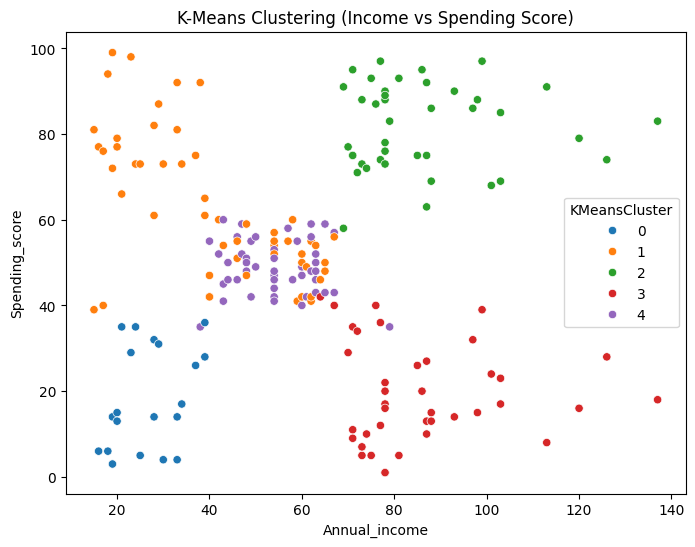

In [ ]:
# Cluster Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual_income', y='Spending_score', hue='KMeansCluster', palette='tab10')
plt.title("K-Means Clustering (Income vs Spending Score)")
plt.show()

In [ ]:
# PCA for 3D Visualization
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

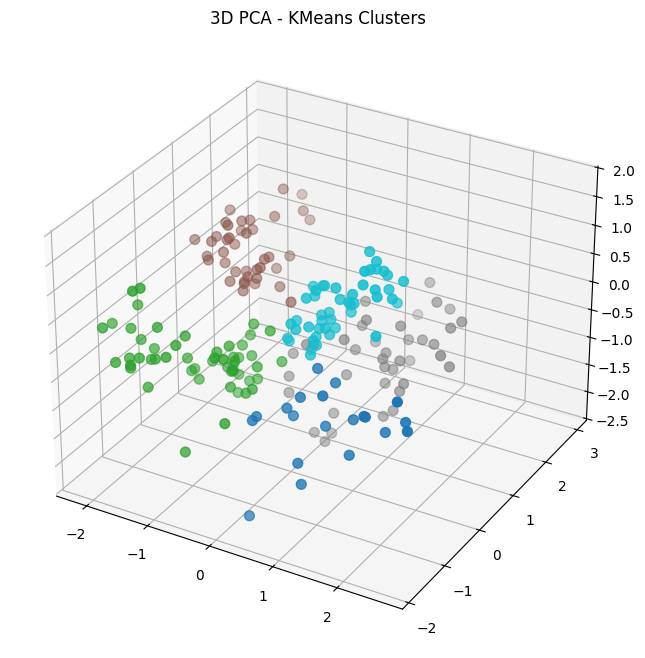

Cluster Profiles:
                     Age  Annual_income  Spending_score
KMeansCluster                                          
0              46.250000      26.750000       18.350000
1              25.185185      41.092593       62.240741
2              32.875000      86.100000       81.525000
3              39.871795      86.102564       19.358974
4              55.638298      54.382979       48.851064


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df['KMeansCluster'], cmap='tab10', s=50)
ax.set_title("3D PCA - KMeans Clusters")
plt.show()

# Cluster profiling
profile = df.groupby('KMeansCluster')[['Age', 'Annual_income', 'Spending_score']].mean()
print("Cluster Profiles:")
print(profile)
